# CS171-EE142 - Fall 2022 - Homework 1

# Due: Thursday, October 13, 2022 @ 11:59pm

### Maximum points: 75 pts


## Submit your solution to Gradescope:
1. Submit a single PDF to **HW1**
2. Submit your jupyter notebook to **HW1-code**

**See the additional submission instructions at the end of this notebook**


## Enter your information below:

### Your Name (submitter): So Yeon Lee

### Your student ID (submitter): 862240392
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview 
In this assignment you will explore some basic computations on data and build a nearest neighbor classifier.  

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). You may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 


In [19]:
# Standard library imports.
import random as rand
from collections import Counter

# Related third party imports.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
from collections import Counter
# Local application/library specific imports.
# import here if you write .py script 

# Getting real data
In this assignment we are going to use the [penguins dataset](https://github.com/allisonhorst/palmerpenguins). 

[More info](https://twitter.com/allison_horst/status/1270046399418138625?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1270046399418138625%7Ctwgr%5E4eb4ba5263d32f342d1474db5259af92ae2c33d3%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.meganstodel.com%2Fposts%2Fno-to-iris%2F)

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/logo.png" height="200" />

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" height="200" />

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" height="200" />

This dataset can also be easily imported from seaborn
https://github.com/mwaskom/seaborn-data

In [3]:
data = sns.load_dataset("penguins") # load penguins dataset from seaborn
data = data.dropna() # drop samples with missing values (NaN) 
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


This data has 344 samples and we keep the 333 samples without missing values 

We will treat `'species'` as the label for each data sample and remaining 6 entries as the features `['island', 'bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']`. 

The `'species'` label has three possible values `['Adelie', 'Chinstrap', 'Gentoo']`.

**Note** *that the arrangement of data samples is different from the notation we used in the class. In the class, data samples are given as column vectors. Here data samples are given as row vectors. `data` has 333 sample vectors, each of length 6 and stored as rows of `data`.*


In this homework, we will only focus on the 4 **numerical features**.
We can visualize pair-wise relations among 4 numerical features 
`['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']` in the data using scatterplot of all pairs of features and color the points by class label.

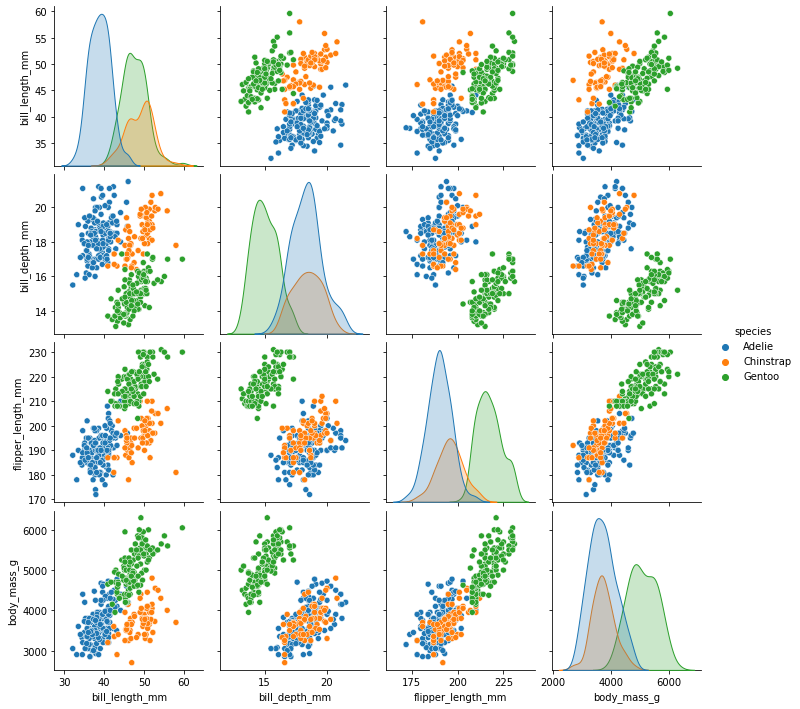

In [4]:
fig = sns.pairplot(data, hue="species")

## Question 1: Basic data analysis [25 pts]

## Question 1a: Counting and simple statistics [5]

1. Calculate and print the min, max, and mean values of each of the four features in the entire dataset [1]

1. Count and print the number of samples that belong to each of the three categories [1] 

1. Calculate and print the mean of each feature for each label as a $3\times 4$ table [3]

*Note: For **mean** values, keep 1 digit after the decimal point when printing*

In [5]:
# TODO: complete the code blocks below

print("\n1. print min, max, mean values of 4 features:\n")
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
for feature in features:
    # TODO  
    # print(f"(min, max, mean) of {feature}: ({}, {}, {})")
    min = data[feature].min()
    max = data[feature].max()
    mean = data[feature].mean().round(1)
    print(f"(min, max, mean) of {feature}: ({min}, {max}, {mean})")
    pass

print("\n2. print number of samples per category:\n")

categories = ['Adelie', 'Chinstrap', 'Gentoo']
for category in categories:
    # TODO
    # print(f"number of samples in {category}: {}")
    count = data['species'].value_counts()[category]
    print(f"number of samples in {category}: {count}")
    pass 

print("\n3. print a 3x4 table of mean value of feature for each label:\n")
# TODO: create a table (as a list) with mean values
table = []
for category in categories:
  row = []
  for feature in features:
    row.append(data.loc[data['species'].eq(category),feature].mean().round(1))
  table.append(row)
pd.set_option("display.precision", 1)
panda_table = pd.DataFrame(data = table, index = categories, columns = features)
panda_table


1. print min, max, mean values of 4 features:

(min, max, mean) of bill_length_mm: (32.1, 59.6, 44.0)
(min, max, mean) of bill_depth_mm: (13.1, 21.5, 17.2)
(min, max, mean) of flipper_length_mm: (172.0, 231.0, 201.0)
(min, max, mean) of body_mass_g: (2700.0, 6300.0, 4207.1)

2. print number of samples per category:

number of samples in Adelie: 146
number of samples in Chinstrap: 68
number of samples in Gentoo: 119

3. print a 3x4 table of mean value of feature for each label:



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
Adelie,38.8,18.3,190.1,3706.2
Chinstrap,48.8,18.4,195.8,3733.1
Gentoo,47.6,15.0,217.2,5092.4


### Question 1b: Implement the $\ell_p$ distance function [10]
1. Write code that implements the Lp distance function between two data points as we saw it in class [7] \\
$\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j$ in $\mathbb{R}^d$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^d |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}. $$
You should implement this function yourself. Do not use any built-in function to compute distance or norm. 

2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [3]

In [17]:
# TODO: complete the function below
def distance(x,y,p=2):
    """calculates Lp distance between point x and point y
    Args:
        x (np.ndarray): datapoint x
        y (np.ndarray): datapoint y
        p (int): order of Lp norm
    """
    sum = np.sum(np.power(x-y,p))
    # print(f"sum: {sum}")
    lp = np.power(sum, 1/p) 
    # print(f"lp: {lp}")
    return lp
    pass



# TODO: pick 2 samples from the dataset (only keep the numerical features)
# calculate the distance and compare with numpy built-in function
data_point1 = data.iloc[15].loc[features]
data_point2 = data.iloc[100].loc[features]
p = 2
dist = distance(data_point1, data_point2, p)
print(f"my distance: {dist}")

# verify using numpy built-in function
dist_np = np.linalg.norm(data_point1 - data_point2, p)
print(f"np distance: {dist_np}")

my distance: 350.89435732140237
np distance: 350.89435732140237


### Question 1c: Compute the distance matrix between all data points [10]
1. Compute an $N\times N$ distance matrix between all data points (where $N=333$ is the number of data points) [3]
2. Plot the above matrix and include a colorbar. Add title and x/y labels to the plot.[3]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [2]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [2]


1. Compute distance matrix


2. Plot matrix with a colorbar.



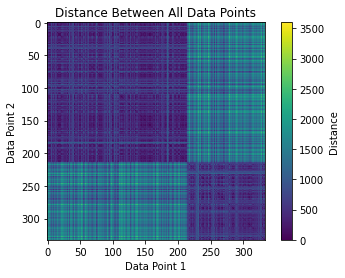

In [93]:
# TODO: complete the function below

print("\n1. Compute distance matrix\n")
dataMatrix = []
for x in range(333):
  temp = []
  data_point1 = data.iloc[x].loc[features]
  for y in range(333):
    data_point2 = data.iloc[y].loc[features]
    temp.append(distance(data_point1, data_point2, 2))
  dataMatrix.append(temp)


print("\n2. Plot matrix with a colorbar.\n")
plt.imshow(dataMatrix)
plt.title("Distance Between All Data Points")
plt.xlabel("Data Point 1")
plt.ylabel("Data Point 2")
plt.colorbar().set_label('Distance')
plt.show()


**Write your answer here**:

3. The minimum number of distance computations needed to find all the values in the matrix is 55278 computations. \\
This was found using n(n-1)/2 for minimum comparisons with all data points.


4. It seems like the Adelie and Chinstrap species have less general $\ell_p$ distance versus deeming them to be more closely related species, compared to the Gentoo species that has more $\ell_p$ distance with both the Adelie and Chinstrap species. \\
Additionally, each species have generally low $\ell_p$ distance with their own same species.

## Question 2: K-Nearest Neighbors Classifier [50 pts]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier [20]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where `test_data` contains test data points, `training_data` contains training data points, `training_labels` holds the training labels, and `K` is the number of neighbors. 

The output of this function should be `pred_labels` which contains the predicted label for each test data point (it should, therefore, have the same number of rows as `test_data`).


In [22]:
# prepare datasets, convert to numpy array, X - data values, Y - labels
X = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].values
all_labels = data['species'].values
unique_labels = np.unique(all_labels)
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
  new_labels[all_labels == unique_labels[i]] = i
Y = new_labels

In [78]:
# TODO: complete the function below

def knnclassify(test_data, training_data, training_labels, K=1):
  """KNN classifier
    Args:
      test_data (numpy.ndarray): Test data points.
      training_data (numpy.ndarray): Training data points.
      training_labels (numpy.ndarray): Training labels.
      K (int): The number of neighbors.
    
    Returns:
      pred_labels: contains the predicted label for each test data point, have the same number of rows as 'test_data'
  """
  pred_labels = []
  for x in test_data:
    temp = []
    i=0
    for y in training_data:
      dist = distance(x, y)
      label = training_labels[i]
      # print(training_labels)
      temp.append([dist, label])
      i+=1
    temp.sort(key=itemgetter(0))
    # print(temp)
    tempK = np.array(temp[0:K])
    # print(tempK)
    c = Counter(tempK[:,1])
    # print(tempK[:,1])
    majority = c.most_common(1)[0][0]
    # print(majority)
    pred_labels.append(majority)
  return pred_labels
  pass

### Question 2b: Measuring performance [20]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,10\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where `test_labels` are the actual class labels and `pred_labels` are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
(training_data, test_data, training_labels, test_labels) = train_test_split(X, Y, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find 
```python
plt.errorbar()
```
useful for this plot.

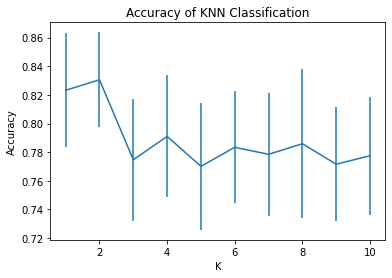

In [95]:
# TODO: write your code here
# You should be able to get above 80% accuracies
accuracies = []
avgAcc = []
for x in range(10):
  temp = []
  for y in range (100):
    (training_data, test_data, training_labels, test_labels) = train_test_split(X, Y, test_size=0.3)
    pred_labels = np.array(knnclassify(test_data, training_data, training_labels, x+1))
    # print(pred_labels)
    # print(test_labels)
    accuracy = sum(test_labels == pred_labels)/len(test_labels)
    temp.append(accuracy)
  accuracies.append(temp)
avgStan = []
for x in range(10):
  mean = np.array(accuracies[x]).mean()
  std = np.array(accuracies[x]).std()
  avgStan.append([mean, std])
# print(avgStan)
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array(avgStan)[:,0]
s = np.array(avgStan)[:,1]
plt.errorbar(x,y,s)
plt.title("Accuracy of KNN Classification")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


**Note about data normalization**

You will notice that if you compute distances using the raw data, the KNN accuracy will be in 77-83% range. 

You can improve the accuracy of the KNN algorithm to above 95% by performing data normalization as the pre-processing step where you can first convert every feature value to the range [0,1] and then perform KNN algorithm. This makes sense in this problem because the four features have a very different range. If you just compute the distance without normalization, then features with large values influence the results more. 

You can read more about such normalization procedures [here](https://en.wikipedia.org/wiki/Feature_scaling).

### Question 2c: Feature Selection [10]

For the following questions, you should perform KNN classification using only 2 features from `['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']` per sample. 

*You may want to refer to pairplot above to decide which features are best*

**Answer the following questions** 

1. Which two features did you choose to get the **best** performance for KNN algorithm? 
1. Which two features did you choose to get the **worst** performance for KNN algorithm? 
2. Why? (Justify your answer) 


**Write your answer here:**

1. bill_length_mm, bill_depth_mm

2. flipper_length_mm, body_mass_g

3. The bill length and depth measurements are relatively on a smaller scale compared to the flipper length and body mass. Therefore, the variations in the measurements for bill length and depth measurements would be smaller than flipper length and body mass, making the bill length and depth more precise features to get the best performance for the KNN algorithm.

---
## Submission instructions
1. Download this Colab to ipynb, and convert it to PDF. Follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF.
 - Download your .ipynb file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded .ipynb file to the area. Or click `Upload to session storage` icon and then select & upload your .ipynb file.
 - Conversion using %%shell. 
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf name_of_hw.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.


  

2. Upload the PDF to Gradescope, select the correct pdf pages for each question. **Important!**

3. Upload the ipynb file to Gradescope

In [96]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf fall2022_hw1.ipynb # make sure the ipynb name is correct

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.lau